# Stock vs Index hurst index estimation - Log S-fbm model

### Done by : Othmane ZARHALI

# Importations

In [20]:
import sys 
import os
sys.path.append(os.path.abspath("/Users/othmane/Desktop/MyPhD/Numerics/Indices vs stocks hurst index GMM estimates/Indices vs stocks hurst index GMM estimates - Codes"))

import matplotlib.pyplot as plt
from math import log
import warnings
warnings.filterwarnings("ignore")

from DataAcquisition import *
from GMMCalibration import *
from LogSfbmModel import *

# Oxford Man institute realized volatility acquisition

In [2]:
File_path = "/Users/othmane/Desktop/MyPhD/Numerics/Indices vs stocks hurst index GMM estimates/Indices vs stocks hurst index GMM estimates - Codes/oxfordmanrealizedvolatilityindices.csv"
realized_vol_data_obj_ox = DataAcquisition('OxfordManInstitute',File_path)

In [3]:
realized_vol_data_obj_ox.IndicesCharging()
indices_list = realized_vol_data_obj_ox.indices_list
vol_dataset = realized_vol_data_obj_ox.dataframe_indices
print(vol_dataset)

         index                 Unnamed: 0 Symbol  close_time  rk_parzen  \
0            0  2000-01-03 00:00:00+00:00   .AEX    163015.0   0.000179   
1            1  2000-01-04 00:00:00+00:00   .AEX    163016.0   0.000423   
2            2  2000-01-05 00:00:00+00:00   .AEX    163016.0   0.000324   
3            3  2000-01-06 00:00:00+00:00   .AEX    163002.0   0.000219   
4            4  2000-01-07 00:00:00+00:00   .AEX    163016.0   0.000155   
...        ...                        ...    ...         ...        ...   
139940  145271  2021-04-05 00:00:00+01:00   .STI    180000.0   0.000004   
139941  145272  2021-04-06 00:00:00+01:00   .STI    180000.0   0.000024   
139942  145273  2021-04-07 00:00:00+01:00   .STI    180000.0   0.000013   
139943  145274  2021-04-08 00:00:00+01:00   .STI    175959.0   0.000009   
139944  145275  2021-04-09 00:00:00+01:00   .STI    180000.0   0.000006   

        open_time  open_price     medrv       rv5        bv  ...    rk_th2  \
0         90101.0    

Indices available

In [4]:
indices_list

['.AEX',
 '.AORD',
 '.BFX',
 '.BSESN',
 '.BVLG',
 '.BVSP',
 '.DJI',
 '.FCHI',
 '.FTMIB',
 '.FTSE',
 '.GDAXI',
 '.GSPTSE',
 '.HSI',
 '.IBEX',
 '.IXIC',
 '.KS11',
 '.KSE',
 '.MXX',
 '.N225',
 '.NSEI',
 '.OMXC20',
 '.OMXHPI',
 '.OMXSPI',
 '.OSEAX',
 '.RUT',
 '.SMSI',
 '.SSEC',
 '.SSMI',
 '.STI']

##### Log vol computation

##### Let's consider two indices : NSEI and STI

In [5]:
log_vols_NSEI = realized_vol_data_obj_ox.GetlogVol(".NSEI",'bv',True,True,False,0,0)
log_vols_STI = realized_vol_data_obj_ox.GetlogVol(".STI",'bv',True,True,False,0,0)
print(log_vols_NSEI,log_vols_STI)

[ -9.09583846  -8.42565538  -8.41514315 ...  -9.20799311 -10.37571292
 -11.10107484] [-10.85806965 -10.23129018  -9.93152778 ...  -9.97600644  -9.8917955
  -9.86773188]


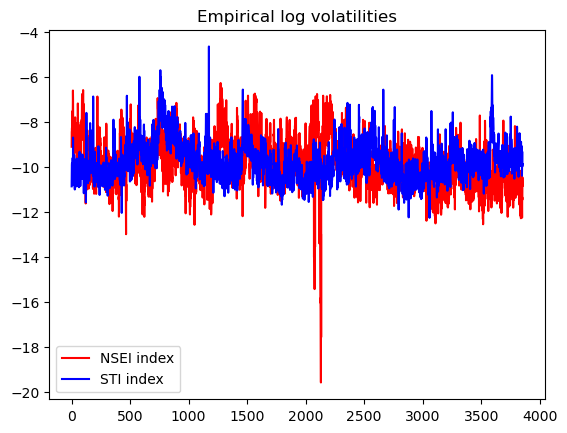

In [6]:
min_length = min(len(log_vols_NSEI),len(log_vols_STI))
time_line = np.arange(min_length)
plt.plot(time_line,log_vols_NSEI[:min_length], color='red',label='NSEI index')
plt.plot(time_line,log_vols_STI[:min_length], color='blue',label='STI index')

plt.title("Empirical log volatilities")
plt.legend()
plt.show()

##### Log vol statistics

##### Numerical tests -  NSEI

In [7]:
# NSEI
logvolvariance_overall_with_lag_NSEI = realized_vol_data_obj_ox.GetlogVolVar_vs_Size(log_vols_NSEI)
print(logvolvariance_overall_with_lag_NSEI)

(array([   8,    9,   12,   14,   18,   22,   28,   34,   42,   52,   64,
         79,   98,  120,  148,  183,  226,  278,  343,  422,  521,  642,
        791,  975, 1201, 1480, 1824, 2248, 2770, 3413, 4206, 5183]), array([0.35842535, 0.37524941, 0.41599062, 0.4381994 , 0.47550027,
       0.50773756, 0.54964531, 0.58411015, 0.62014323, 0.65322222,
       0.6802255 , 0.7074864 , 0.73739737, 0.76633661, 0.79322425,
       0.81666472, 0.83875362, 0.86066882, 0.87920371, 0.89422324,
       0.9089994 , 0.92457659, 0.93926288, 0.95923213, 0.98452674,
       1.01168093, 1.04670444, 1.09140392, 1.13095154, 1.16028133,
       1.13001706,        nan]))


In [8]:
means_and_variance_eachday_in_week = realized_vol_data_obj_ox.ComputeMeanVarianceinWeek('.NSEI')
print(means_and_variance_eachday_in_week)

(array([-9.05457534, -8.70085103, -9.18843551, -9.21880093, -9.81530079]), array([0.78077038, 1.53100143, 0.56212798, 0.51751696, 0.01510113]))


In [9]:
correl = Correlation(log_vols_NSEI,log_vols_NSEI)
print(correl)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), array([1.08385978, 0.78083193, 0.701292  , 0.65365305, 0.61472904,
       0.61077713, 0.55307408, 0.52553815, 0.49779351, 0.49031727,
       0.49593499, 0.45630645, 0.43516446, 0.43246381, 0.41850497,
       0.409631  , 0.37083193, 0.34827862, 0.34972304, 0.33220779,
       0.31701237, 0.28914225, 0.28188284, 0.28132966, 0.28327881,
       0.27685011, 0.26077149, 0.25676326, 0.25973784, 0.2636926 ,
       0.25447167, 0.24994179, 0.2480732 , 0.25472634, 0.25905081,
       0.25614122, 0.24835241, 0.25703416, 0.24836318, 0.25128471,
       0.24110904, 0.23756706, 0.24073382, 0.25230844, 0.26547803,
       0.26772659, 0.26084441, 0.26888187, 0.28068201, 0.26864436,
       0.28446571]))


##### Numerical tests -  STI

In [10]:
# STI
logvolvariance_overall_with_lag_STI = realized_vol_data_obj_ox.GetlogVolVar_vs_Size(log_vols_STI)
print(logvolvariance_overall_with_lag_STI)

(array([   8,    9,   11,   14,   17,   21,   26,   32,   39,   48,   58,
         71,   87,  106,  130,  158,  193,  236,  288,  352,  430,  525,
        641,  782,  955, 1165, 1422, 1736, 2119, 2587, 3157, 3854]), array([0.18273815, 0.18972343, 0.20144343, 0.21593706, 0.22769403,
       0.24095312, 0.25510806, 0.26978724, 0.28439693, 0.30015858,
       0.31527965, 0.33189439, 0.34916642, 0.36677116, 0.38499093,
       0.40253773, 0.42001739, 0.43867449, 0.45920557, 0.48098552,
       0.5068847 , 0.53854361, 0.57256764, 0.60256036, 0.60940972,
       0.61395769, 0.62028397, 0.62769465, 0.63290987, 0.6567422 ,
       0.69929094,        nan]))


In [11]:
means_and_variance_eachday_in_week = realized_vol_data_obj_ox.ComputeMeanVarianceinWeek(".STI")
print(means_and_variance_eachday_in_week)

(array([-10.85806965, -10.23129018,  -9.93152778,  -9.82895074,
       -10.09268284]), array([1.15224036, 0.19949187, 0.02157454, 0.00196299, 0.09488728]))


In [12]:
correl = Correlation(log_vols_STI,log_vols_STI)
print(correl)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), array([0.65945294, 0.49742405, 0.45827235, 0.44268707, 0.42729325,
       0.42060089, 0.40239439, 0.39835343, 0.39364837, 0.38300065,
       0.38237012, 0.36583987, 0.35021808, 0.35613399, 0.35539619,
       0.34918668, 0.3409036 , 0.33442755, 0.32939468, 0.32731938,
       0.32173866, 0.31295264, 0.31003246, 0.30617113, 0.30392936,
       0.30272755, 0.29056251, 0.2869957 , 0.28180388, 0.27833755,
       0.27958174, 0.27724508, 0.27578545, 0.26964285, 0.27446028,
       0.28156098, 0.2679243 , 0.26988708, 0.26415253, 0.26117487,
       0.26394733, 0.2579122 , 0.25592286, 0.24922336, 0.24350831,
       0.25146695, 0.24683316, 0.23884517, 0.23807632, 0.2312326 ,
       0.23689783]))


# Yahoo finance data acquisition

##### Log vol computation

##### Let's consider two stocks : GOOGL and AMZN

##### GOOGL

In [13]:
realized_vol_data_obj_yf_GOOGL = DataAcquisition('Yahoo finance')

In [14]:
realized_vol_data_obj_yf_GOOGL.IndicesCharging("GOOGL",first_date="1900-01-01",last_date="2034-01-01")
market_data_GOOGL = realized_vol_data_obj_yf_GOOGL.dataframe_indices

[*********************100%***********************]  1 of 1 completed


In [15]:
market_data_GOOGL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,2.511011,893181924
2004-08-20,2.527778,2.729730,2.515015,2.710460,2.710460,456686856
2004-08-23,2.771522,2.839840,2.728979,2.737738,2.737738,365122512
2004-08-24,2.783784,2.792793,2.591842,2.624374,2.624374,304946748
2004-08-25,2.626627,2.702703,2.599600,2.652653,2.652653,183772044
...,...,...,...,...,...,...
2022-10-31,95.419998,96.029999,93.980003,94.510002,94.510002,31675000
2022-11-01,95.449997,96.029999,90.370003,90.470001,90.470001,47161400
2022-11-02,90.940002,91.180000,86.879997,86.970001,86.970001,57038300


In [16]:
market_capitalization_GOOGL = realized_vol_data_obj_yf_GOOGL.market_capitalization

In [17]:
signal_test_GOOGL = market_data_GOOGL["Close"]

In [18]:
removed0signal_test_GOOGL = realized_vol_data_obj_yf_GOOGL.removeZeros(np.array(signal_test_GOOGL))
log_vol_estimator_GOOGL = realized_vol_data_obj_yf_GOOGL.ComputeLogVolEstimator()

##### AMZN

In [19]:
realized_vol_data_obj_yf_AMZN = DataAcquisition('Yahoo finance')

In [20]:
realized_vol_data_obj_yf_AMZN.IndicesCharging("AMZN",first_date="1900-01-01",last_date="2034-01-01")
market_data_AMZN = realized_vol_data_obj_yf_AMZN.dataframe_indices

[*********************100%***********************]  1 of 1 completed


In [21]:
market_data_AMZN

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...
2022-10-31,103.559998,104.870003,100.739998,102.440002,102.440002,99251400
2022-11-01,103.989998,104.580002,96.059998,96.790001,96.790001,153370000
2022-11-02,97.320000,97.739998,92.010002,92.120003,92.120003,135761800


In [22]:
market_capitalization_AMZN = realized_vol_data_obj_yf_AMZN.market_capitalization

In [23]:
signal_test_AMZN = market_data_AMZN["Close"]

In [24]:
removed0signal_test_AMZN = realized_vol_data_obj_yf_AMZN.removeZeros(np.array(signal_test_AMZN))
log_vol_estimator_AMZN = realized_vol_data_obj_yf_AMZN.ComputeLogVolEstimator()

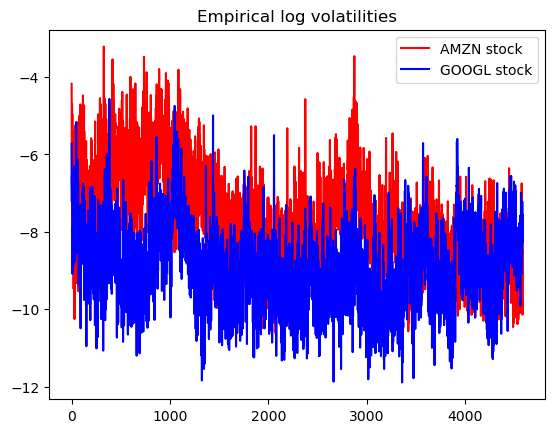

In [25]:
min_length = min(len(log_vol_estimator_AMZN),len(log_vol_estimator_GOOGL))
time_line = np.arange(min_length)
plt.plot(time_line,log_vol_estimator_AMZN[:min_length], color='red',label='AMZN stock')
plt.plot(time_line,log_vol_estimator_GOOGL[:min_length], color='blue',label='GOOGL stock')

plt.title("Empirical log volatilities")
plt.legend()
plt.show()

# GMM Calibration

In [26]:
GMM_obj = GMM()

### GMM on indices

##### NSEI

Objective function value after calibration =  0.005103800266207834


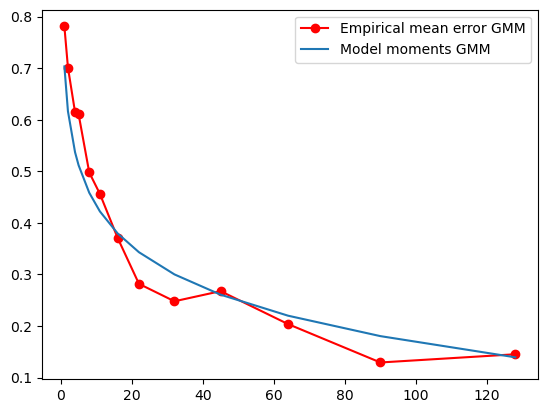

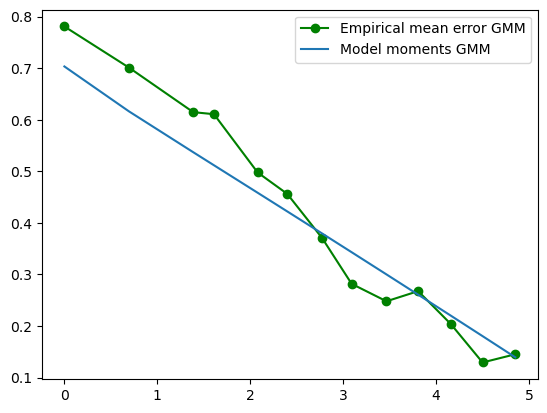

H =  0.0057291444703173825 lambda2 = 0.10926801856007884 T =  1.0716252664623354 lsigma2 = 4.5399929762484854e-05 p-Value=  0.0031764054520594612 J =  26.452996772724262 J_95 =  18.30703805327515
------------------------------------------------------


(0.0057291444703173825,
 0.10926801856007884,
 1.0716252664623354,
 4.5399929762484854e-05,
 0.0031764054520594612,
 26.452996772724262,
 18.30703805327515,
 [array([0.78083193, 0.701292  , 0.61472904, 0.61077713, 0.49779351,
         0.45630645, 0.37083193, 0.28188284, 0.2480732 , 0.26772659,
         0.203828  , 0.12942438, 0.14536152]),
  array([0.70332469, 0.61644459, 0.53707532, 0.51177171, 0.45848254,
         0.42229908, 0.37959653, 0.34317654, 0.30016429, 0.26087228,
         0.22011946, 0.18051758, 0.13944159]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [27]:
calibrated_parameters_NSEI = GMM_obj.ComputeParamsGMM(log_vols_NSEI)
calibrated_parameters_NSEI

##### STI

Objective function value after calibration =  0.0011198642548073128


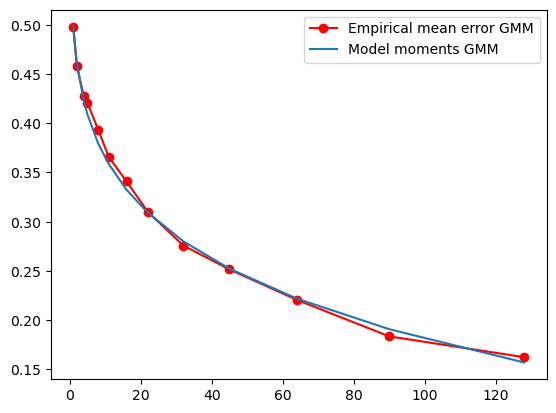

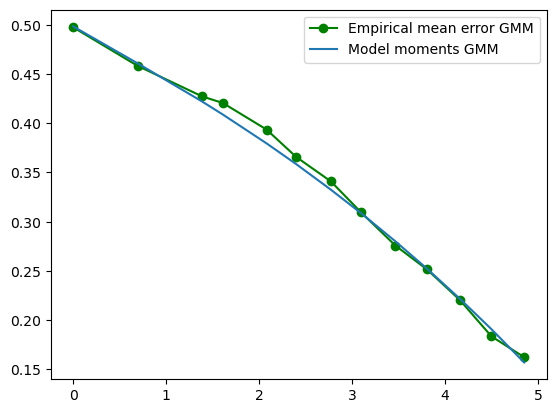

H =  0.076972167347693 lambda2 = 0.03952835398816385 T =  2.6278243571722353 lsigma2 = 4.5399929762484854e-05 p-Value=  0.9319700526550283 J =  4.315956838027383 J_95 =  18.30703805327515
------------------------------------------------------


(0.076972167347693,
 0.03952835398816385,
 2.6278243571722353,
 4.5399929762484854e-05,
 0.9319700526550283,
 4.315956838027383,
 18.30703805327515,
 [array([0.49742405, 0.45827235, 0.42729325, 0.42060089, 0.39364837,
         0.36583987, 0.3409036 , 0.31003246, 0.27578545, 0.25146695,
         0.22053445, 0.18351524, 0.16235613]),
  array([0.49831654, 0.46081518, 0.42208908, 0.40887157, 0.37959705,
         0.35856292, 0.33247639, 0.3091001 , 0.2800925 , 0.25220777,
         0.22182169, 0.19079908, 0.15699248]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [28]:
calibrated_parameters_STI = GMM_obj.ComputeParamsGMM(log_vols_STI)
calibrated_parameters_STI

### GMM on stocks

##### GOOGL

Objective function value after calibration =  0.0012758825352117995


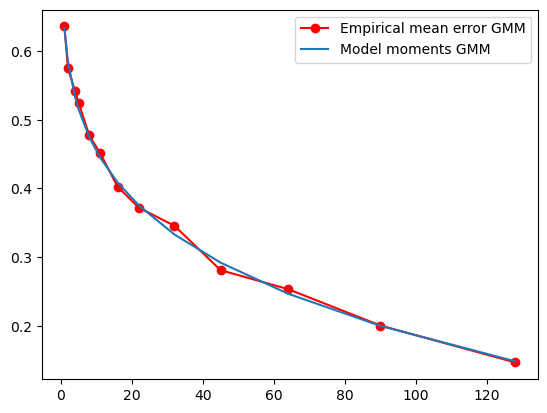

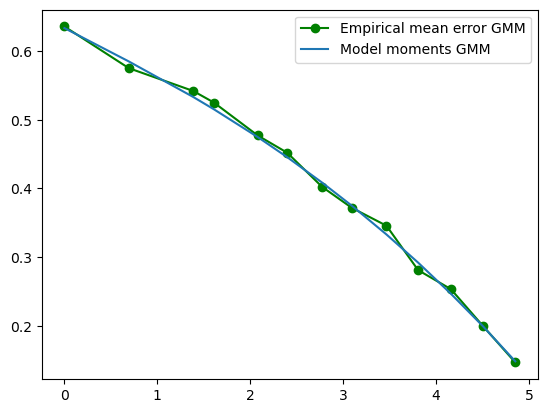

H =  0.09524549092868048 lambda2 = 0.04869421438667486 T =  2.989845158271545 lsigma2 = 4.5399929762484854e-05 p-Value=  0.8275017096549366 J =  5.852473189016524 J_95 =  18.30703805327515
------------------------------------------------------


(0.09524549092868048,
 0.04869421438667486,
 2.989845158271545,
 4.5399929762484854e-05,
 0.8275017096549366,
 5.852473189016524,
 18.30703805327515,
 [array([0.63588497, 0.57520767, 0.54197406, 0.52508142, 0.47725591,
         0.4520355 , 0.4024518 , 0.37199034, 0.34577697, 0.28110383,
         0.25346801, 0.20050305, 0.14669678]),
  array([0.63357374, 0.58498701, 0.53324548, 0.51527747, 0.47496238,
         0.44557339, 0.40865809, 0.37515629, 0.3330527 , 0.29204645,
         0.24679191, 0.20000057, 0.14835993]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [29]:
calibrated_parameters_GOOGL = GMM_obj.ComputeParamsGMM(log_vol_estimator_GOOGL)
calibrated_parameters_GOOGL

##### AMZN

Objective function value after calibration =  0.0007464430525290051


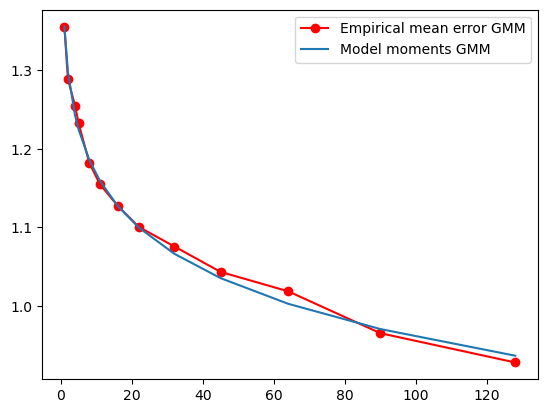

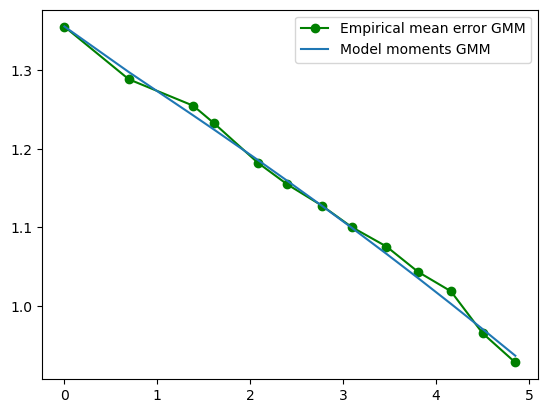

H =  0.029206883130497876 lambda2 = 0.06904131686015191 T =  2.073823867358184 lsigma2 = 4.5399929762484854e-05 p-Value=  0.904948587158725 J =  4.7869392958685095 J_95 =  18.30703805327515
------------------------------------------------------


(0.029206883130497876,
 0.06904131686015191,
 2.073823867358184,
 4.5399929762484854e-05,
 0.904948587158725,
 4.7869392958685095,
 18.30703805327515,
 [array([1.35543875, 1.28842838, 1.25478872, 1.23253901, 1.18240475,
         1.15468171, 1.1274858 , 1.10042168, 1.0755892 , 1.0432736 ,
         1.01865405, 0.9652916 , 0.92802169]),
  array([1.35563318, 1.29763685, 1.24244462, 1.22444663, 1.18590924,
         1.15924921, 1.12726739, 1.09954254, 1.06626137, 1.03534349,
         1.00274985, 0.97055703, 0.93661799]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [30]:
calibrated_parameters_AMZN = GMM_obj.ComputeParamsGMM(log_vol_estimator_AMZN)
calibrated_parameters_AMZN

### Multiple Stock and indices calibration

### Indices

In [31]:
Indices_test_symbols = ['.AEX','.AORD','.BFX', '.BSESN']

In [32]:
logvol_synthesis_ox = realized_vol_data_obj_ox.LogVolSynthesisOverAssets(Indices_test_symbols)
logvol_synthesis_ox

{'.AEX': array([ -9.363648  ,  -9.2829408 ,  -9.50419861, ..., -10.49494979,
        -10.66919384, -10.78024093]),
 '.AORD': array([ -9.810457  , -10.30105542,  -9.36433307, ...,  -9.88412876,
        -10.28379873, -11.13394767]),
 '.BFX': array([ -9.71483899, -10.46947439, -10.05192215, ..., -10.47888137,
        -10.44993989, -11.10387582]),
 '.BSESN': array([ -8.93322485,  -8.79850441,  -8.76741764, ..., -10.37471496,
        -10.16140705, -10.44435716])}

In [33]:
GMM_obj.MultipleGMMCalibrations(logvol_synthesis_ox)

Objective function value after calibration =  0.0032210815825441316
H =  0.14739455298747367 lambda2 = 0.03478874834818246 T =  6.330689125490588 lsigma2 = 4.5399929762484854e-05 p-Value=  0.08794816829829626 J =  16.430737152557615 J_95 =  18.30703805327515
------------------------------------------------------
Objective function value after calibration =  0.001775709058769154
H =  0.19043755566642726 lambda2 = 0.01722883840919475 T =  10.211014241445007 lsigma2 = 4.5399929762484854e-05 p-Value=  0.5350379858026036 J =  8.969106455842997 J_95 =  18.30703805327515
------------------------------------------------------
Objective function value after calibration =  0.001592158885945428
H =  0.13658321648161037 lambda2 = 0.03116574378265726 T =  5.573823482479472 lsigma2 = 4.5399929762484854e-05 p-Value=  0.6171156638094241 J =  8.120010318321683 J_95 =  18.30703805327515
------------------------------------------------------
Objective function value after calibration =  0.001221244479094

,Assets,H,lambda2,exp(T),exp(lsigma2),pvalue,J,J_95
0,.AEX,0.147395,0.034789,6.330689,0.000045,0.087948,16.430737,18.307038
1,.AORD,0.190438,0.017229,10.211014,0.000045,0.535038,8.969106,18.307038
2,.BFX,0.136583,0.031166,5.573823,0.000045,0.617116,8.120010,18.307038
3,.BSESN,0.061786,0.052662,2.467283,0.000045,0.810317,6.058594,18.307038


### Stocks

In [34]:
Stocks_test_symbols = ["GOOGL","AAPL","AMZN"]

In [35]:
realized_vol_data_obj_yf= DataAcquisition('Yahoo finance')

In [36]:
logvol_synthesis_yf = realized_vol_data_obj_yf.LogVolSynthesisOverAssets(Stocks_test_symbols)
logvol_synthesis_yf

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


{'GOOGL': array([-5.72021842, -6.51914773, -7.21603027, ..., -7.83119121,
        -8.281413  , -7.56352142]),
 'AAPL': array([-11.57375652, -12.94782852, -12.79575501, ...,  -7.0243272 ,
         -8.44066915,  -6.48814455]),
 'AMZN': array([-4.17546521, -5.44415333, -5.70028569, ..., -7.3231513 ,
        -7.21512383, -6.74468885])}

In [37]:
GMM_obj.MultipleGMMCalibrations(logvol_synthesis_yf)

Objective function value after calibration =  0.0012758825352117995
H =  0.09524549092868048 lambda2 = 0.04869421438667486 T =  2.989845158271545 lsigma2 = 4.5399929762484854e-05 p-Value=  0.8275017096549366 J =  5.852473189016524 J_95 =  18.30703805327515
------------------------------------------------------
Objective function value after calibration =  0.0008193222682555058
H =  0.06489883743101184 lambda2 = 0.059212936819477764 T =  3.2921256089259145 lsigma2 = 4.5399929762484854e-05 p-Value=  0.5650181057161185 J =  8.656139764135188 J_95 =  18.30703805327515
------------------------------------------------------
Objective function value after calibration =  0.0007464430525290051
H =  0.029206883130497876 lambda2 = 0.06904131686015191 T =  2.073823867358184 lsigma2 = 4.5399929762484854e-05 p-Value=  0.904948587158725 J =  4.7869392958685095 J_95 =  18.30703805327515
------------------------------------------------------


,Assets,H,lambda2,exp(T),exp(lsigma2),pvalue,J,J_95
0,GOOGL,0.095245,0.048694,2.989845,0.000045,0.827502,5.852473,18.307038
1,AAPL,0.064899,0.059213,3.292126,0.000045,0.565018,8.656140,18.307038
2,AMZN,0.029207,0.069041,2.073824,0.000045,0.904949,4.786939,18.307038


### Conclusion : No surprise !
### - Single assets have very low estimated hurst index than indices

# Mutlidimensional S-fbm model generation

- ### 2 dimensional S fbm

#### Model construction

In [10]:
size = 4000

In [22]:
MultidimS_fbm_model = MultidimensionalSfbm([Sfbm(H=0.064899,lambdasquare=0.059213,T=log(3.292126)),Sfbm(H=0.064899,lambdasquare=0.059213,T=log(3.292126))])  

In [23]:
S_fbm_model_mutlidimensionalgeneration_example = MultidimS_fbm_model.GenerateMultidimensionalSfbm(size)

size =  4000 subsample =  4
size =  4000 subsample =  4


In [24]:
S_fbm_model_mutlidimensionalgeneration_example

[(array([  0.40607723,   0.58582289,  -0.22839242, ..., -21.67865638,
         -21.56370683, -22.10571898]),
  array([4.99365871e-01, 8.85837134e-01, 2.09053283e+00, ...,
         3.83058374e+03, 3.83104466e+03, 3.83151000e+03])),
 (array([  0.12231048,   0.24837964,   1.1368947 , ..., -81.28575799,
         -81.94474073, -81.50854971]),
  array([5.98567021e-03, 6.89193155e-02, 1.25144596e+00, ...,
         4.07776696e+03, 4.07859984e+03, 4.07887882e+03]))]

In [25]:
index_builder = MultidimS_fbm_model.Index_Builder([0.5,0.5],S_fbm_model_mutlidimensionalgeneration_example,'mrm and mrw')

#### Log vol curve

In [26]:
log_vol_index_generation_direct = MultidimS_fbm_model.GeneratelogVolMultidimSfbm_Index([0.5,0.5],'direct',size)

GeneratelogVolMultidimSfbm_Index im here
size =  4000 subsample =  8
size =  4000 subsample =  8


#### H estimate

In [27]:
GMM_index = GMM()

Objective function value after calibration =  0.09065790792896566


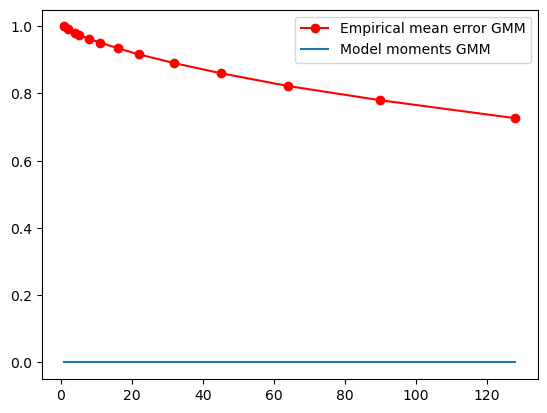

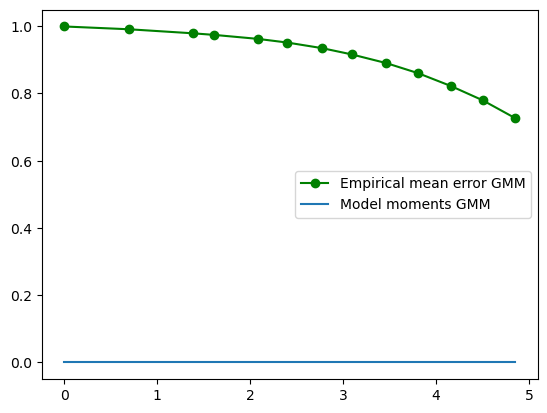

H =  0.8143127216879648 lambda2 = 0.0025956748252476116 T =  22026.465794806718 lsigma2 = 4.5399929762484854e-05 p-Value=  8.29290699485344e-72 J =  362.6316317158627 J_95 =  18.30703805327515
------------------------------------------------------


In [28]:
index_estimatedGMM_param = GMM_index.ComputeParamsGMM(log_vol_index_generation_direct)